<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/w10_workshop_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import data
url = 'https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv'
data = pd.read_csv(url)
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [8]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [7]:
#create model
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


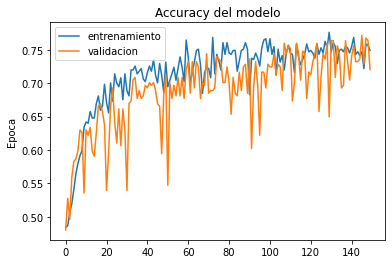

In [17]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy del modelo")
plt.ylabel('Accuracy')
plt.ylabel('Epoca')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')

- El modelo tiende a seguir aumentando durante las ultimas epocas
- No hay overfitting, ya que muestra una habilidad comparable en ambos conjuntos

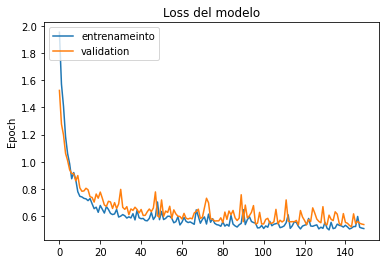

In [18]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del modelo')
plt.ylabel('Epoch')
plt.legend(['entrenameinto', 'validation'], loc='upper left')

- La grafica de perdida se obtiene un rendimiento comparable entre el train y test
- no hay un desvio significativo, por lo tanto el modelo no tendria que ser entrenado con menos epocas